In [2]:
weather_api_key

'015c4c561421ddff03c47d38a9791cfd'

In [1]:
%matplotlib inline

# Import Dependencies
import json
import requests
import numpy as np
import pandas as pd
from citipy import citipy
from config import weather_api_key
from random import uniform
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# Create a DataFrame to append City and Country code
series_names = ["City", "Country"]
city_name_df = pd.DataFrame(columns = series_names)

In [4]:
# Use random to generate unbiased list of cities
for x in range(2000):
    lat, lon = np.random.uniform(low = -90.000, high = 90.000), np.random.uniform(low = -180.000, high = 180.000)
    city = citipy.nearest_city(lat,lon)
    city_name_df = city_name_df.append({"City": city.city_name,"Country": city.country_code}, ignore_index = True)
    
# Remove duplicate cities
city_name_df = city_name_df.drop_duplicates(subset = "City").reset_index()
city_name_df.count()

index      726
City       726
Country    726
dtype: int64

In [5]:
series_names = ["City",
                "Country",
                "Latitude",
                "Longitude",
                "Temperature $F^o$",
                "% Humidity",
                "% Cloudiness",
                "Wind Speed (mph)"
               ]

# Print DataFrame to check series titles
new_city_df = pd.DataFrame(columns = series_names)
new_city_df

,City,Country,Latitude,Longitude,Temperature $F^o$,% Humidity,% Cloudiness,Wind Speed (mph)


In [6]:
# Test URL
url = "http://api.openweathermap.org/data/2.5/weather?"
target_url = url + "appid=" + weather_api_key + "&units=IMPERIAL" + "&q=" + "San Diego, California"
city_query = requests.get(target_url).json()
print(json.dumps(city_query, indent = 2, sort_keys = True))

{
  "base": "stations",
  "clouds": {
    "all": 1
  },
  "cod": 200,
  "coord": {
    "lat": 32.72,
    "lon": -117.16
  },
  "dt": 1537221360,
  "id": 5391811,
  "main": {
    "humidity": 56,
    "pressure": 1012,
    "temp": 81.18,
    "temp_max": 89.96,
    "temp_min": 75.02
  },
  "name": "San Diego",
  "sys": {
    "country": "US",
    "id": 473,
    "message": 0.0178,
    "sunrise": 1537191258,
    "sunset": 1537235437,
    "type": 1
  },
  "visibility": 16093,
  "weather": [
    {
      "description": "clear sky",
      "icon": "01d",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 290,
    "speed": 14.99
  }
}


In [7]:
# Build URL to openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

# Set up loop to find API's for each city
for index, row in city_name_df.iterrows():
    target_city = row["City"]
    units = "IMPERIAL"
    target_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + target_city.replace(" ","+")
    city_query = requests.get(target_url).json()
    
    if city_query["cod"] == "404":
        print("Cannot find City.")
        
    else:
        new_city_df.set_value(index, "City", city_query["name"])
        new_city_df.set_value(index, "Country", city_query["sys"]["country"])
        new_city_df.set_value(index, "Temperature $F^o$", city_query["main"]["temp"])
        new_city_df.set_value(index, "Latitude", city_query["coord"]["lat"])
        new_city_df.set_value(index, "Longitude", city_query["coord"]["lon"])
        new_city_df.set_value(index, "% Humidity", city_query["main"]["humidity"])
        new_city_df.set_value(index, "% Cloudiness", city_query["clouds"]["all"])
        new_city_df.set_value(index, "Wind Speed (mph)", city_query["wind"]["speed"])
        
        print("***************")
        print("City # ", row_count, " --> ", city_query["name"], city_query["sys"]["country"])
        print(target_url)
        row_count += 1

C:\Users\Beau\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Beau\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Beau\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Beau\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Beau\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. 

***************
City #  1  -->  Paracatu BR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=paracatu
***************
City #  2  -->  Vila Franca do Campo PT
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=vila+franca+do+campo
***************
City #  3  -->  Teodoro Sampaio BR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=teodoro+sampaio
***************
City #  4  -->  Tasiilaq GL
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=tasiilaq
***************
City #  5  -->  Cape Town ZA
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=cape+town
***************
City #  6  -->  Bredasdorp ZA
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=bredasdorp
***************
City

***************
City #  53  -->  Provideniya RU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=provideniya
***************
City #  54  -->  San-Pedro CI
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=san-pedro
***************
City #  55  -->  Natal BR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=natal
***************
City #  56  -->  Fairbanks US
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=fairbanks
Cannot find City.
***************
City #  57  -->  Arraial do Cabo BR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=arraial+do+cabo
Cannot find City.
***************
City #  58  -->  Ponta do Sol BR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=ponta+do+

***************
City #  104  -->  Alice Springs AU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=alice+springs
***************
City #  105  -->  Jamestown AU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=jamestown
***************
City #  106  -->  Bereda ES
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=bereda
***************
City #  107  -->  Hithadhoo MV
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=hithadhoo
***************
City #  108  -->  Santa Luzia BR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=santa+luzia
***************
City #  109  -->  Uyovu TZ
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=uyovu
***************
City #  110  -->  Okakarar

***************
City #  155  -->  Kaitong CN
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=kaitong
***************
City #  156  -->  Vestmanna FO
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=vestmanna
***************
City #  157  -->  Portland US
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=portland
***************
City #  158  -->  Saldanha PT
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=saldanha
***************
City #  159  -->  Mount Isa AU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=mount+isa
***************
City #  160  -->  Sovetskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=sovetskiy
Cannot find City.
***************
City #  161  -

***************
City #  207  -->  Coihaique CL
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=coihaique
***************
City #  208  -->  Quatre Cocos MU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=quatre+cocos
***************
City #  209  -->  Esperance TT
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=esperance
***************
City #  210  -->  Opunake NZ
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=opunake
***************
City #  211  -->  Sao Joao da Barra BR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=sao+joao+da+barra
***************
City #  212  -->  Meulaboh ID
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=meulaboh
***************
City #  

***************
City #  259  -->  Kudahuvadhoo MV
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=kudahuvadhoo
***************
City #  260  -->  Bondo CD
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=bondo
***************
City #  261  -->  Nhulunbuy AU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=nhulunbuy
***************
City #  262  -->  Gadwal IN
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=gadwal
***************
City #  263  -->  Mahebourg MU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=mahebourg
***************
City #  264  -->  Ruwi OM
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=ruwi
***************
City #  265  -->  Sokoni CD
http://api.ope

***************
City #  311  -->  Port Macquarie AU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=port+macquarie
***************
City #  312  -->  Maraba BR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=maraba
***************
City #  313  -->  Pacifica US
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=pacifica
Cannot find City.
***************
City #  314  -->  Fort Nelson CA
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=fort+nelson
***************
City #  315  -->  Bima ID
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=bima
***************
City #  316  -->  Ilam IR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=ilam
Cannot find City.
***************
Ci

***************
City #  363  -->  Hualmay PE
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=hualmay
***************
City #  364  -->  Cururupu BR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=cururupu
***************
City #  365  -->  Saint-Louis CH
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=saint-louis
***************
City #  366  -->  Margate AU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=margate
***************
City #  367  -->  Cherskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=cherskiy
***************
City #  368  -->  Kahului US
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=kahului
***************
City #  369  -->  Brekstad NO
http:/

***************
City #  415  -->  Maracaibo CO
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=maracaibo
***************
City #  416  -->  Ambulu ID
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=ambulu
Cannot find City.
***************
City #  417  -->  Dondo MZ
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=dondo
***************
City #  418  -->  Diu IN
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=diu
***************
City #  419  -->  Saint-Avold FR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=saint-avold
***************
City #  420  -->  Nanortalik GL
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=nanortalik
***************
City #  421  -->  Abalak N

***************
City #  467  -->  May Pen JM
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=may+pen
***************
City #  468  -->  Itirucu BR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=itirucu
***************
City #  469  -->  Ekhabi RU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=ekhabi
***************
City #  470  -->  Nanakuli US
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=nanakuli
***************
City #  471  -->  Omboue GA
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=omboue
***************
City #  472  -->  Karaj IR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=karaj
***************
City #  473  -->  Gorin US
http://api.openweathermap.o

Cannot find City.
Cannot find City.
***************
City #  518  -->  Otjiwarongo NA
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=otjiwarongo
***************
City #  519  -->  Koslan RU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=koslan
Cannot find City.
***************
City #  520  -->  Ihosy MG
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=ihosy
***************
City #  521  -->  George Town MY
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=george+town
***************
City #  522  -->  Jumla NP
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=jumla
Cannot find City.
***************
City #  523  -->  Nepomuceno BR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IM

***************
City #  569  -->  Cockburn Town TC
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=cockburn+town
***************
City #  570  -->  Kunszentmiklos HU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=kunszentmiklos
Cannot find City.
***************
City #  571  -->  Magadan RU
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=magadan
***************
City #  572  -->  Sao Francisco BR
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=sao+francisco
***************
City #  573  -->  Sarahan IN
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=sarahan
***************
City #  574  -->  Punganuru IN
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=punganuru
****

***************
City #  621  -->  Pedasi PA
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=pedasi
***************
City #  622  -->  Te Anau NZ
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=te+anau
***************
City #  623  -->  Jonesboro US
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=jonesboro
***************
City #  624  -->  Chimbote PE
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=chimbote
***************
City #  625  -->  Sechura PE
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=sechura
***************
City #  626  -->  Rabat MA
http://api.openweathermap.org/data/2.5/weather?appid=015c4c561421ddff03c47d38a9791cfd&units=IMPERIAL&q=rabat
***************
City #  627  -->  Morros BR
http://api.openweath

In [8]:
new_city_df.head()

,City,Country,Latitude,Longitude,Temperature $F^o$,% Humidity,% Cloudiness,Wind Speed (mph)
0,Paracatu,BR,-17.22,-46.87,67.55,94,76,6.4
1,Vila Franca do Campo,PT,37.72,-25.43,69.8,88,20,12.75
2,Teodoro Sampaio,BR,-22.53,-52.17,68.54,100,92,3.94
3,Tasiilaq,GL,65.61,-37.64,46.4,49,76,20.8
4,Cape Town,ZA,-33.93,18.42,57.2,87,75,18.34


In [9]:
# Save DataFrame to csv file
new_city_df.to_csv("WeatherPy_DataFrame", index_label = "City #")

In [10]:
# Set up timestamp for plot titles
timestamp = datetime.now().strftime('%B %d %Y')
print(timestamp)

September 17 2018


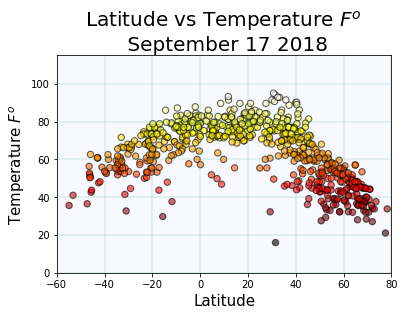

In [12]:
# Set up title, axis labels and graph features
fig, ax = plt.subplots()
plt.title(f"Latitude vs Temperature $F^o$ \n {timestamp}",fontsize=20)
plt.xlabel("Latitude", fontsize= 15)
plt.ylabel("Temperature $F^o$", fontsize= 15)
plt.grid(color = "mediumseagreen", linewidth = .25, )
plt.xlim([-60, 80])
plt.ylim([0,115])
ax.set_facecolor("ghostwhite")


# Set up Scatter Plot for Latitude vs. Temperature
plt.scatter(new_city_df["Latitude"],
            new_city_df["Temperature $F^o$"],
            c = new_city_df["Temperature $F^o$"],
            s = 40,
            marker = "o",
            cmap = "hot",
            alpha = .60,
            edgecolor = "black",
            linewidths = 1.1,
           )

# Save image
plt.savefig("images/Latitude_Temperature", bbox_inches = "tight", dpi = 100)
plt.show()

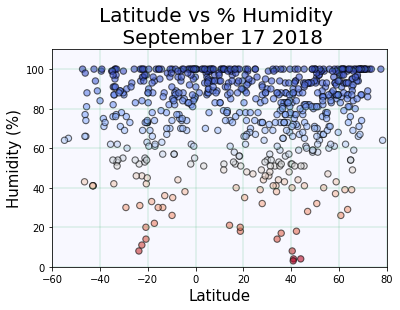

In [16]:
# Set up title, axis labels and graph features
fig2, ax = plt.subplots()
plt.title(f"Latitude vs % Humidity \n {timestamp}",
fontsize=20)
plt.xlabel("Latitude",fontsize= 15)
plt.ylabel("Humidity (%)",fontsize= 15)
plt.grid(color = "mediumseagreen", linewidth = .25)
plt.xlim([-60, 80])
plt.ylim([-0,110])
ax.set_facecolor("ghostwhite")

# Set up Scatter Plot for Latitude vs. Humidity
plt.scatter(new_city_df["Latitude"],
            new_city_df["% Humidity"],
            c = new_city_df["% Humidity"],
            s = 40,
            marker = "o",
            cmap = "coolwarm_r",
            alpha = .60,
            edgecolor = "black",
            linewidths = 1.1,
           )

# Save image
plt.savefig("images/Latitude_Humidity", bbox_inches = "tight", dpi = 100)
plt.show()

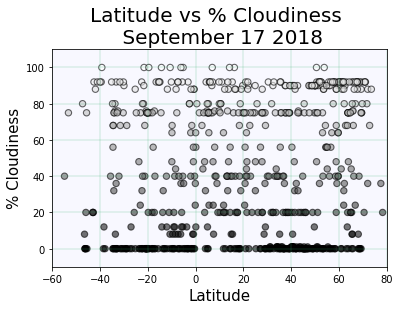

In [14]:
# Set up title, axis labels and graph features
fig3, ax = plt.subplots()
plt.title(f"Latitude vs % Cloudiness \n {timestamp}",fontsize=20)
plt.xlabel("Latitude",fontsize= 15)
plt.ylabel("% Cloudiness",fontsize= 15)
plt.grid(color = "mediumseagreen", linewidth = .25)
plt.xlim([-60, 80])
plt.ylim([-10,110])
ax.set_facecolor("ghostwhite")

# Set up Scatter Plot for Latitude vs. Cloudiness
plt.scatter(new_city_df["Latitude"],
            new_city_df["% Cloudiness"],
            c = new_city_df["% Cloudiness"],
            s = 40,
            marker = "o",
            cmap = "gist_yarg_r",
            alpha = .60,
            edgecolor = "black",
            linewidths = 1.1,
           )

# Save image
plt.savefig("images/Latitude_Cloudiness", bbox_inches = "tight", dpi = 100)
plt.show()

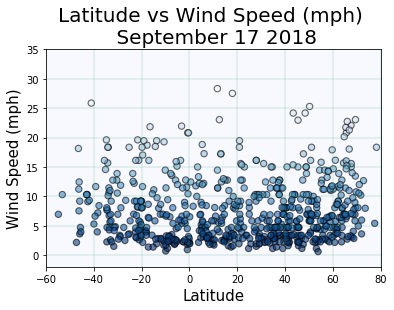

In [17]:
# Set up title, axis labels and graph features
fig4, ax = plt.subplots()
plt.title(f"Latitude vs Wind Speed (mph) \n {timestamp}",fontsize=20)
plt.xlabel("Latitude",fontsize= 15)
plt.ylabel("Wind Speed (mph)",fontsize= 15)
plt.grid(color = "mediumseagreen", linewidth = .25)
plt.xlim([-60, 80])
plt.ylim([-2,35])
ax.set_facecolor("ghostwhite")

# Set up Scatter Plot for Latitude vs. Wind Speed (mph)
plt.scatter(new_city_df["Latitude"],
            new_city_df["Wind Speed (mph)"],
            c = new_city_df["Wind Speed (mph)"],
            s = 40,
            marker = "o",
            cmap = "Blues_r",
            alpha = .60,
            edgecolor = "black",
            linewidths = 1.1,
           )

# Save image
plt.savefig("images/Latitude_Wind", bbox_inches = "tight", dpi = 100)
plt.show()

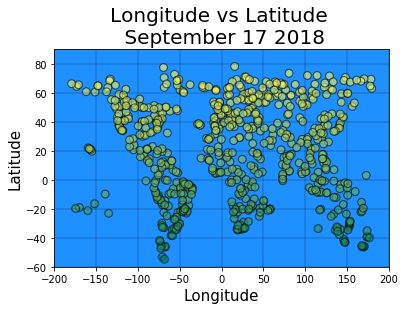

In [18]:
# Set up title, axis labels and graph features
fig5, ax = plt.subplots()
plt.title(f"Longitude vs Latitude \n {timestamp}",
fontsize=20)
plt.xlabel("Longitude",fontsize= 15)
plt.ylabel("Latitude",fontsize= 15)
plt.grid(color = "black", linewidth = .25)
plt.xlim([-200, 200])
plt.ylim([-60,90])
ax.set_facecolor("dodgerblue")

# Set up Scatter Plot for Latitude vs. Wind Speed (mph)
plt.scatter(new_city_df["Longitude"],
            new_city_df["Latitude"],
            c = new_city_df["Latitude"],
            s = 60,
            marker = "o",
            cmap = "summer",
            alpha = .60,
            edgecolor = "black",
            linewidths = 1.1,
           )

# Save image
plt.savefig("images/Latitude_Longitude", bbox_inches = "tight", dpi = 100)
plt.show()